# Minimal spanning trees

## Overview

__Summary:__ In this lesson we reintroduce the concept of the __tree__ and connect it to a new question about graphs: How do we find a "minimal" structure within a graph that serves as a kind of "backbone" for the graph? We introduce the concept of the __weighted graph__ and the concept of a __spanning tree__, then study two algorithms for constructing a spanning tree -- __Kruskal's Algorithm__ and __Prim's Algorithm__. 


## Background

### Spanning trees

The main problem for this lesson is illustrated by the following example. Suppose there is a network of eight towns (numbered 0 through 7) connected by 12 roads: 

<img src="roads.png">

The local government wants to construct bike paths that connect all eight of the towns. That is, a person in any of these towns should be able to bike to any of the other towns without leaving the bike path. We _could_ do this by simply putting down 12 bike paths, each of which runs parallel to one of the roads. However, this is a lot more construction than is strictly necessary. For example if we built bike paths directly linking towns 0, 4, and 5, it would be redundant because all we really need to connect is 0 to 4 and 0 to 5. That third bike path from 4 to 5 is not necessary. 

What the planners would want to know is, _what is the least amount of construction we need to do in order to be able to bike to any of the other towns?_ This would minimize cost and labor, without sacrificing bike access. 

Well, here is one possible answer to this question: Construct the paths along the red-colored edges: 

<img src="roads_mst.png">

Notice that all the towns are included in this red subgraph, so it's possible to get from any one town to any of the others via the bike path -- although it may not be a direct route. Also, notice that there are _no cycles_ in the red subgraph. As you might have noticed above, cycles in a graph are a source of redundancy -- in this problem they are an unnecessary extra cost. We didn't need the direct route from 4 to 5, because there was already  a sequence of edges from 4 to 0 then 0 to 5. 

In other words, the structure that minimizes the cost here is a __tree__ -- a connected graph with no cycles -- that lives inside the original graph and that includes all the nodes of the original graph but without all the edges. 

That idea has a name: 

>__Definition:__ Let $G$ be any graph. A subgraph $H$ of $G$ is called a __spanning tree__ if $H$ is a tree that includes all the nodes of $G$. 

The red graph above is a spanning tree for the road network graph. Note that graphs can have many different spanning trees. Here's another for the road/bike path network, for example: 

<img src="roads_mst2.png">

The big question for this lesson is how to construct a spanning tree for an arbitrary graph. But first, we will introduce one other new idea. 


### Weighted graphs

Going back to the towns and bike paths example, we assumed that minimizing cost of construction of the bike paths meant simply finding a spanning tree for the graph. But this makes an assumption that _the cost is the same no matter which two towns we connect_. That might not be the case in real life. For example maybe town 1 is 100 miles from any of the other towns, but the remaining towns are close together. In that case we would want to have as few paths going through town 1 as possible. Or, perhaps the road from town 2 to town 3 goes around a steep and curving mountainside and it would be significantly more expensive to create the bike path. There's a lot of information that this road graph is _not_ showing. 


Suppose after some further study, the road engineers are able to estimate the cost of constructing a bike path between any pair of cities: 

| Pair of cities | Cost (in $10K increments) |
|:-------------: | :-----------------------: |
| 0, 2 | 1 
| 0, 3 | 6
| 0, 4 | 6 
| 0, 5 | 7 
| 0, 7 | 10 
| 1, 2 | 8 
| 1, 5 | 6
| 2, 3 | 5
| 2, 6 | 6 
| 3, 5 | 6
| 3, 6 | 1
| 4, 5 | 2

(For example, it costs $50000 to build the bike path from town 2 to town 3.) We could attach this data to the edges of the graph like so: 

<img src="roads_weighted.png">

(We change the layout here so the edge labels can be seen more easily.) 

When we create a graph like this with numerical values attached to each of the edges, it's called a __weighted graph__. The edge labels are called the _weights_. Of course these don't necessarily mean literally weight, but the numbers could represent anything -- cost, distance, etc. 

A question we want to ask about weighted graphs is the _total weight of a subgraph_. For example if you look at the path from 2 to 5, its total weight is $8 + 6 = 14$. It would cost $140,000 just to build a bike path along that path. And if all we care about is getting from 2 to 5, then there is a "cheaper" way to do it: 2, to 0, to 5 which has a total weight of just 8. 

This brings us around to spanning trees again. This road graph could have many different spanning trees; we saw two different ones a little earlier. But they may not all _cost_ the same. For example: 

+ The first spanning tree given above with edges {0,2}, {0,3}, {0,4}, {0,5}, {0,7}, {1,2}, and {2,6} has a total weight of $1 + 6 + 6 + 7 + 10 + 8 + 6 = 44$. 
+ The second spanning tree with edges {0,2}, {0,4}, {0,5}, {0,7}, {1,2}, {2,6}, {2,3} has a total weight of $1+6+7+10+8+6+5 = 43$. It would cost $10,000 less to build the second bike path network than it would the first one. 

So _not all spanning trees of a weighted graph will have the same total weight_. A question that we would want to ask, and that the local authorities would definitely want to ask is: 

>__What spanning tree for a weighted graph has the _smallest possible_ total weight?__

In other words, we have not examined all the possible spanning trees for the road network here; it could very well be the case that there is an even cheaper spanning tree stil out there to be discovered. How do we find it, apart from brute force? 

That's the question we will answer next. But first let's define the object we are talking about: 

>__Definition:__ Let $G$ be a weighted graph. Then a subgraph $H$ of $G$ is said to be a __minimum spanning tree__ of $G$ if $H$ is a spanning tree, and if $K$ is any other spanning tree, then $K$ has a total weight that is greater than or equal to that of $H$. 

In other words a minimum spanning tree for a weighted graph is a spanning tree (connected, no cycles, contains all of $G$'s nodes) that has the smallest total weight of any spanning tree of $G$. 


### Prim's Algorithm

Finding a minimum spanning tree for a weighted graph is an extremely important problem in real life and in computer sciece. It turns out there are very good ways of doing so, and we now introduce two different algorithms for constructing the minimum spanning tree of a weighted graph. 

The first algorithm for finding a minimal spanning tree for a weighted graph is called __Prim's Algorithm__. To learn this algorithm, please watch the following 7-minute video: 

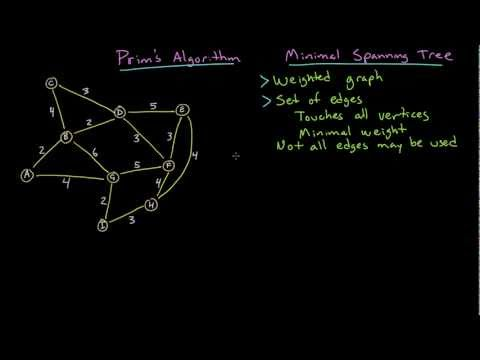

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("YyLaRffCdk4")

### Kruskal's Algorithm

The first algorithm for finding a minimal spanning tree for a weighted graph is called __Prim's Algorithm__. To learn this algorithm, please watch the following 5-minute video: 

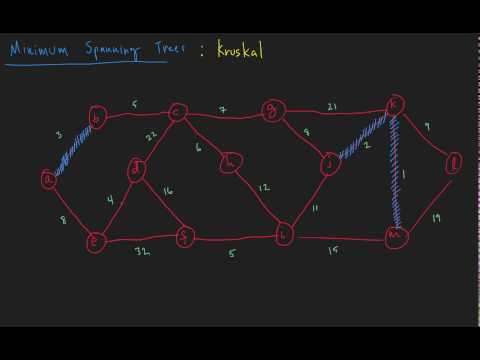

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("rcJTZXZJVUs")

Note some of the differences between these algorithms: 

+ Prim's Algorithm starts by choosing a random node to initialize the tree. Kruskal's Algorithm starts with no such choice; instead we first sort the edges by weight. 
+ Prim's Algorithm grows the tree incrementally, one edge at a time, and it's always a tree at every stage of the algorithm. In Kruskal's algorithm we could add an edge that is not even connected to the other edges, and it just comes together "magically" in the end. 

Also note that sometimes both algorithms could require arbitrary choices of nodes or edges. This is OK; we may end up with different spanning trees based on those choices but they will all have the same weight, which will be the lowest possible. (Why is that true?) 


### Where we are going from here

In this reading you've learned about 

+ Trees
+ Spanning trees for a graph
+ Weighted graphs
+ Minimum spanning trees for a weighted graph
+ Two algorithms for constructing a minimum spanning tree

What's next is to practice with using those two algorithms, and taking a look at some more applications of this idea. 